In [62]:
! mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [63]:
! kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [64]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [65]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [66]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [67]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [68]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 103ms/step - loss: 1.3541 - accuracy: 0.5860 - val_loss: 0.6698 - val_accuracy: 0.6332
Epoch 2/10
625/625 [==============================] - 68s 107ms/step - loss: 0.5895 - accuracy: 0.6941 - val_loss: 0.5834 - val_accuracy: 0.7010
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4854 - accuracy: 0.7684 - val_loss: 0.4724 - val_accuracy: 0.7750
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4287 - accuracy: 0.8055 - val_loss: 0.7920 - val_accuracy: 0.6442
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3666 - accuracy: 0.8394 - val_loss: 0.3957 - val_accuracy: 0.8184
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2933 - accuracy: 0.8717 - val_loss: 0.4183 - val_accuracy: 0.8124
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2237 - accuracy: 0.9071 - val_loss: 0.5270 - val_ac

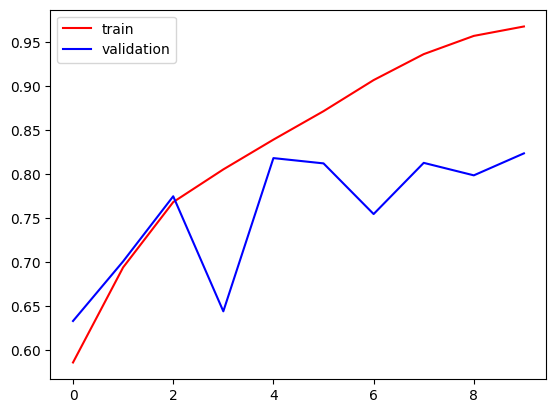

In [70]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

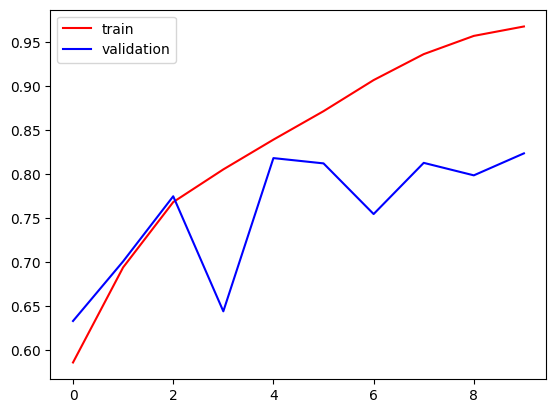

In [71]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

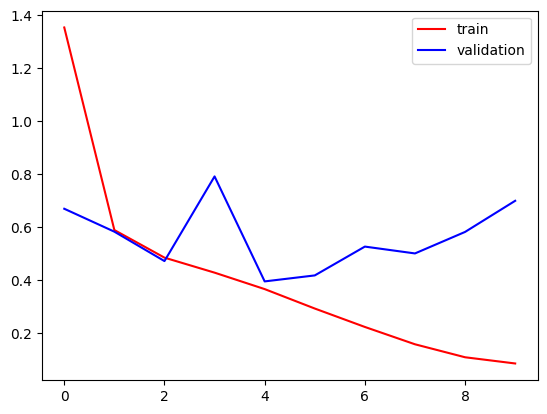

In [72]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

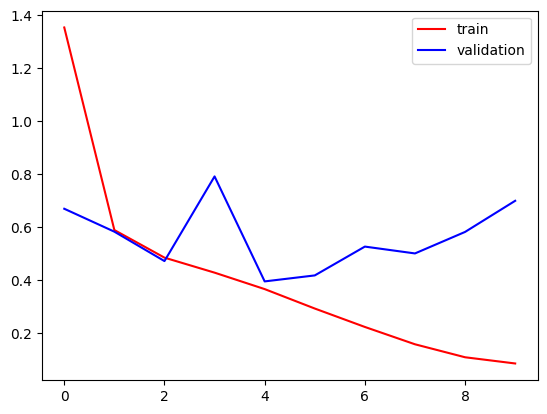

In [73]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [74]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [75]:
import cv2

In [76]:
test_img = cv2.imread('/content/cat-551554_1280.jpg')

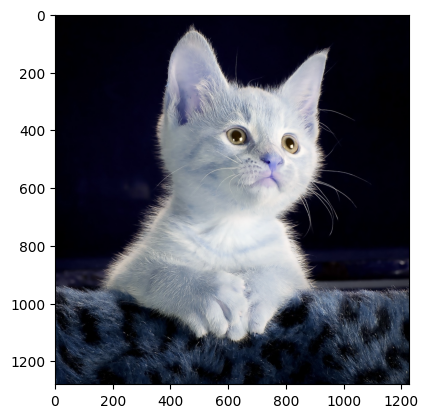

In [77]:
plt.imshow(test_img)

In [78]:
test_img.shape

(1280, 1225, 3)

In [79]:
test_img = cv2.resize(test_img,(256,256))

In [80]:
test_input = test_img.reshape((1,256,256,3))

In [81]:
k=model.predict(test_input)

1/1 [==============================] - 0s 113ms/step


In [82]:
if k == 1:
  print("DOG")
else:
  print("CAT")

CAT
